In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data, label = datasets.make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 1, 
                                           n_informative = 2, n_redundant = 0, random_state = 3)

In [3]:
data.shape

(1000, 2)

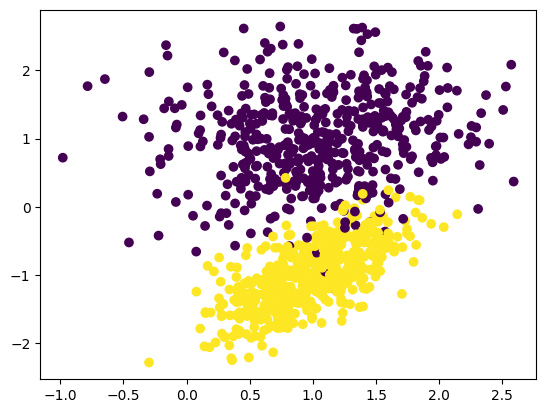

In [4]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [5]:
# datasets.make_classification?

In [6]:
label[label == 0] = -1

In [34]:
class SVM:
    def __init__(self, c = 0.001):
        self.c = c
        self.w = 0
        self.b = 0
    
    def hingeloss(self, w, b, x, y):
        loss = 0
        loss += 0.5 * (np.dot(w, w.T))
        
        for i in range(x.shape[0]):
            ti = y[i] * (np.dot(w, x[i]) + b)
            loss += self.c * max(0, (1 - ti))
        return loss[0][0]
    
    def gradient_descent(self, x, y, lr_rate = 0.003, epoch = 1000, batch_size = 200):
        
        W = np.zeros((1, x.shape[1]))
        B = 0
        h_loss = self.hingeloss(W, B, x, y)
        loss = []
        loss.append(h_loss)
        
        for i in range(epoch):
            loss.append(self.hingeloss(W, B, x, y))
            
            idx = np.arange(x.shape[0])
            np.random.shuffle(idx)
            
            for batch in range(int(x.shape[0]/batch_size)):
                grad_w = 0
                grad_b = 0
                
                for j in range(batch * batch_size, (batch + 1) * batch_size):
                    j = idx[j]
                    ti = y[j] * (np.dot(W, x[j]) + B)
                    
                    if ti >= 1:
                        grad_w = 0
                        grad_b = 0
                    else:
                        grad_w += self.c * y[j] * x[j]
                        grad_b += self.c * y[j]
                W = W - lr_rate * W + lr_rate * grad_w
                B = B - lr_rate * grad_b
            
        self.w = W
        self.b = B
        return W, B, loss

In [47]:
svm = SVM()

In [48]:
W, B, loss = svm.gradient_descent(data, label)

In [49]:
loss[-10:]

[0.8198988339020414,
 0.8198986937747992,
 0.8198984225096948,
 0.8198985985985409,
 0.8198987772393097,
 0.819899043469096,
 0.8198991233969666,
 0.8198992633153666,
 0.8198991224357817,
 0.8198992151320009]

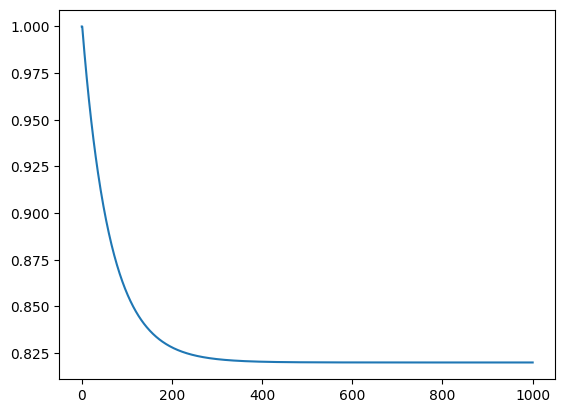

In [50]:
plt.plot(loss)

In [51]:
W

array([[-0.00600952, -0.19996595]])

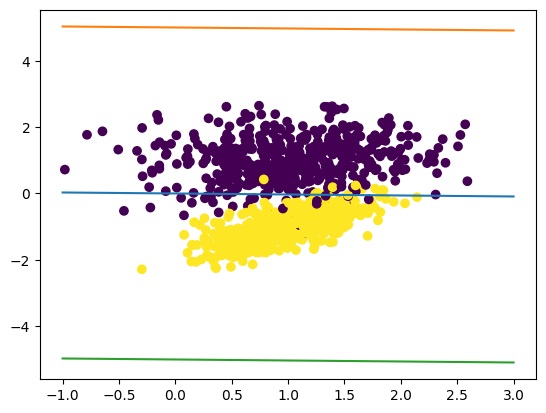

In [52]:
x0 = np.arange(-1, 4)
x1 = -(B + (W[0, 0] * x0))/W[0, 1]

s1 = -(B + (W[0, 0] * x0) + 1)/W[0, 1]
s2 = -(B + (W[0, 0] * x0) - 1)/W[0, 1]

plt.plot(x0, x1)
plt.plot(x0, s1)
plt.plot(x0, s2)
plt.scatter(data[:, 0], data[:, 1], c = label)